# Preamble

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pet_cli.tcms_as_convolutions as pet_tcm
import pet_cli.reference_tissue_models as pet_rtms
from importlib import reload

sns.set()
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.6)
plt.rcParams['font.family'] ='StixGeneral'
plt.rcParams['mathtext.fontset'] = 'stix'

# Simplified Reference Tissue Model (SRTM)

The analytical solution for the SRTM describes the tissue TAC, $C(t)$, as a function of a reference TAC, $C_\mathrm{R}(t)$, is:
$$
C(t) = R_{1} C_\mathrm{R}(t) + \left( k_{2} - \frac{R_{1}k_{2}}{1+\mathrm{BP_\mathrm{ND}}} \right) C_\mathrm{R}(t)\otimes \exp\left[-\frac{k_{2}}{1+\mathrm{BP_\mathrm{ND}}} t\right].
$$
By defining $\alpha\equiv\frac{k_{2}}{1+\mathrm{BP_\mathrm{ND}}}$, we can rewrite the equation as:
$$
C(t) = R_{1} C_\mathrm{R}(t) + \left( k_{2} - R_{1}\alpha\right) C_\mathrm{R}(t)\otimes \exp\left[-\alpha \cdot t\right].
$$

## Loading An Input Function To Generate A Reference Region

In [6]:
ref_input_times, ref_input_vals = np.asarray(np.loadtxt("../../data/tcm_tacs/fdg_plasma_clamp_evenly_resampled.txt").T, float)
ref_input_times /= 60.0 #Converting from minutes to seconds
ref_tac_times, ref_tac_vals  = pet_tcm.generate_tac_1tcm_c1_from_tac(tac_times=ref_input_times,
                                                                     tac_vals=ref_input_vals,
                                                                     k1=0.5, 
                                                                     k2=2.0)

### Example Reference Region

In [7]:
srtm_test_params = np.asarray((0.5, 1.0, 3.0))
srtm_tac_vals = pet_rtms.calc_srtm_tac(tac_times=ref_tac_times, 
                          ref_tac_vals=ref_tac_vals, 
                          r1=srtm_test_params[0], 
                          k2=srtm_test_params[1], 
                          bp=srtm_test_params[2])

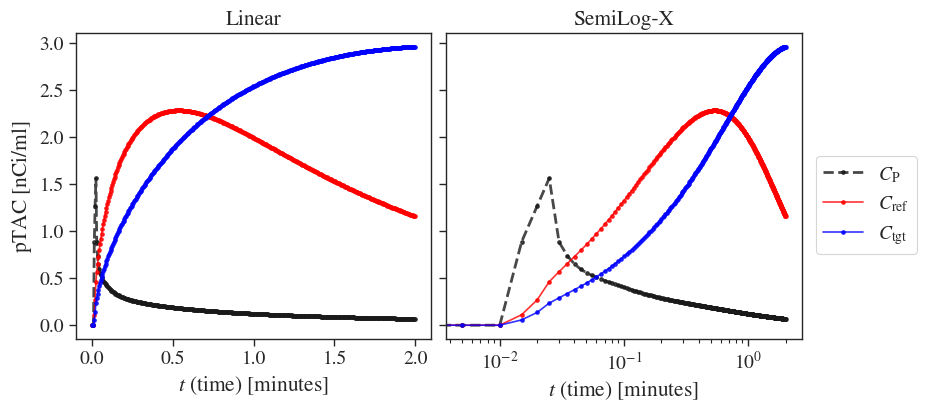

In [8]:
myFig, myAx = plt.subplots(1,2, constrained_layout=True, figsize=[8,4], sharey=True)
for anAx in myAx.flatten():
    anAx.plot(ref_input_times, ref_input_vals/50., '.--', alpha=0.8, color='k', label=r'$C_\mathrm{P}$', lw=2)
    anAx.plot(ref_tac_times, ref_tac_vals, '.-', alpha=0.8, color='red', label=r'$C_\mathrm{ref}$')
    anAx.plot(ref_tac_times, srtm_tac_vals, '.-', alpha=0.8, color='blue', label=r'$C_\mathrm{tgt}$')
    anAx.set(xlabel=r'$t$ (time) [minutes]')
myAx[0].set(ylabel=r'pTAC [$\mathrm{n Ci / ml}$]', title='Linear')
myAx[1].set(xscale='log', title='SemiLog-X')
myFig.legend(*myAx[0].get_legend_handles_labels(), bbox_to_anchor=(1.0, 0.5), loc='center left')
plt.show()